In [21]:
import pickle
import os
import numpy as np
import glob
from matplotlib import pyplot as plt

In [22]:
root = './results'


# experiment = 'MOLHIV-20210518-himplike'              # ~ 190k params
# experiment = 'MOLHIV-20210518-pnalike'               # ~ 530k params
# experiment = 'MOLHIV-20210518-64-025-200'            # ~ 4M params (dropout on inputs as well)
# experiment = 'MOLHIV-20210518-64-000-025-200-50'     # ~ 4M params
# -------------------------------------------------------------------------------------
# experiment = 'MOLHIV-20210519-himplike_cofaces'        # ~ 206k params
# experiment = 'MOLHIV-20210519-himplike_cofaces_e150'   # ~ 206k params
experiment = 'MOLHIV-20210519-himplike_cofaces_e150_r12'   # ~ 206k params
# experiment = 'MOLHIV-20210519-pnalike_lr1e-3_cofaces'  # ~ 580k params

seeds = [0, 1, 2, 3, 4, 5, 43]
folder = f'{root}/{experiment}/'+'seed-{}/'

In [23]:
curve_list = list()
seeds_found = []
for seed in seeds:
    try:
        path = folder.format(seed)+'curves.pkl'
        print(f'Reading from {path}')
        with open(path, 'rb') as handle:
            curves = pickle.load(handle)
        curve_list.append(curves)
        seeds_found.append(seed)
    except FileNotFoundError:
        pass
print('{} results found.'.format(len(curve_list)))

Reading from ./results/MOLHIV-20210519-himplike_cofaces_e150_r12/seed-0/curves.pkl
Reading from ./results/MOLHIV-20210519-himplike_cofaces_e150_r12/seed-1/curves.pkl
Reading from ./results/MOLHIV-20210519-himplike_cofaces_e150_r12/seed-2/curves.pkl
Reading from ./results/MOLHIV-20210519-himplike_cofaces_e150_r12/seed-3/curves.pkl
Reading from ./results/MOLHIV-20210519-himplike_cofaces_e150_r12/seed-4/curves.pkl
Reading from ./results/MOLHIV-20210519-himplike_cofaces_e150_r12/seed-5/curves.pkl
Reading from ./results/MOLHIV-20210519-himplike_cofaces_e150_r12/seed-43/curves.pkl
6 results found.


In [24]:
def collect(curve_list, curve_name):
    return [[item for item in curves[curve_name]] for curves in curve_list]

def plot_curves(curves, ylim=None, agg=None, err_agg=None, anchors=None):
    plt.figure(dpi=300)
    if agg is not None:
        y_center = agg(np.asarray(curves), axis=0)
        if err_agg is not None:
            y_err = err_agg(np.asarray(curves), axis=0)
            plt.fill_between(range(len(curves[0])), y_center+y_err, y_center-y_err, alpha=0.2, color='cornflowerblue', linewidth=0.0)
        plt.plot(y_center, lw=0.5)
    else:
        for curve in curves:
            plt.plot(curve, lw=0.5)
    if anchors is not None:
        for anc in anchors:
            plt.axhline(y=anc, lw=0.3, color='lightgrey')
    if ylim is not None:
        plt.ylim(ylim)
    plt.show()
    plt.close()

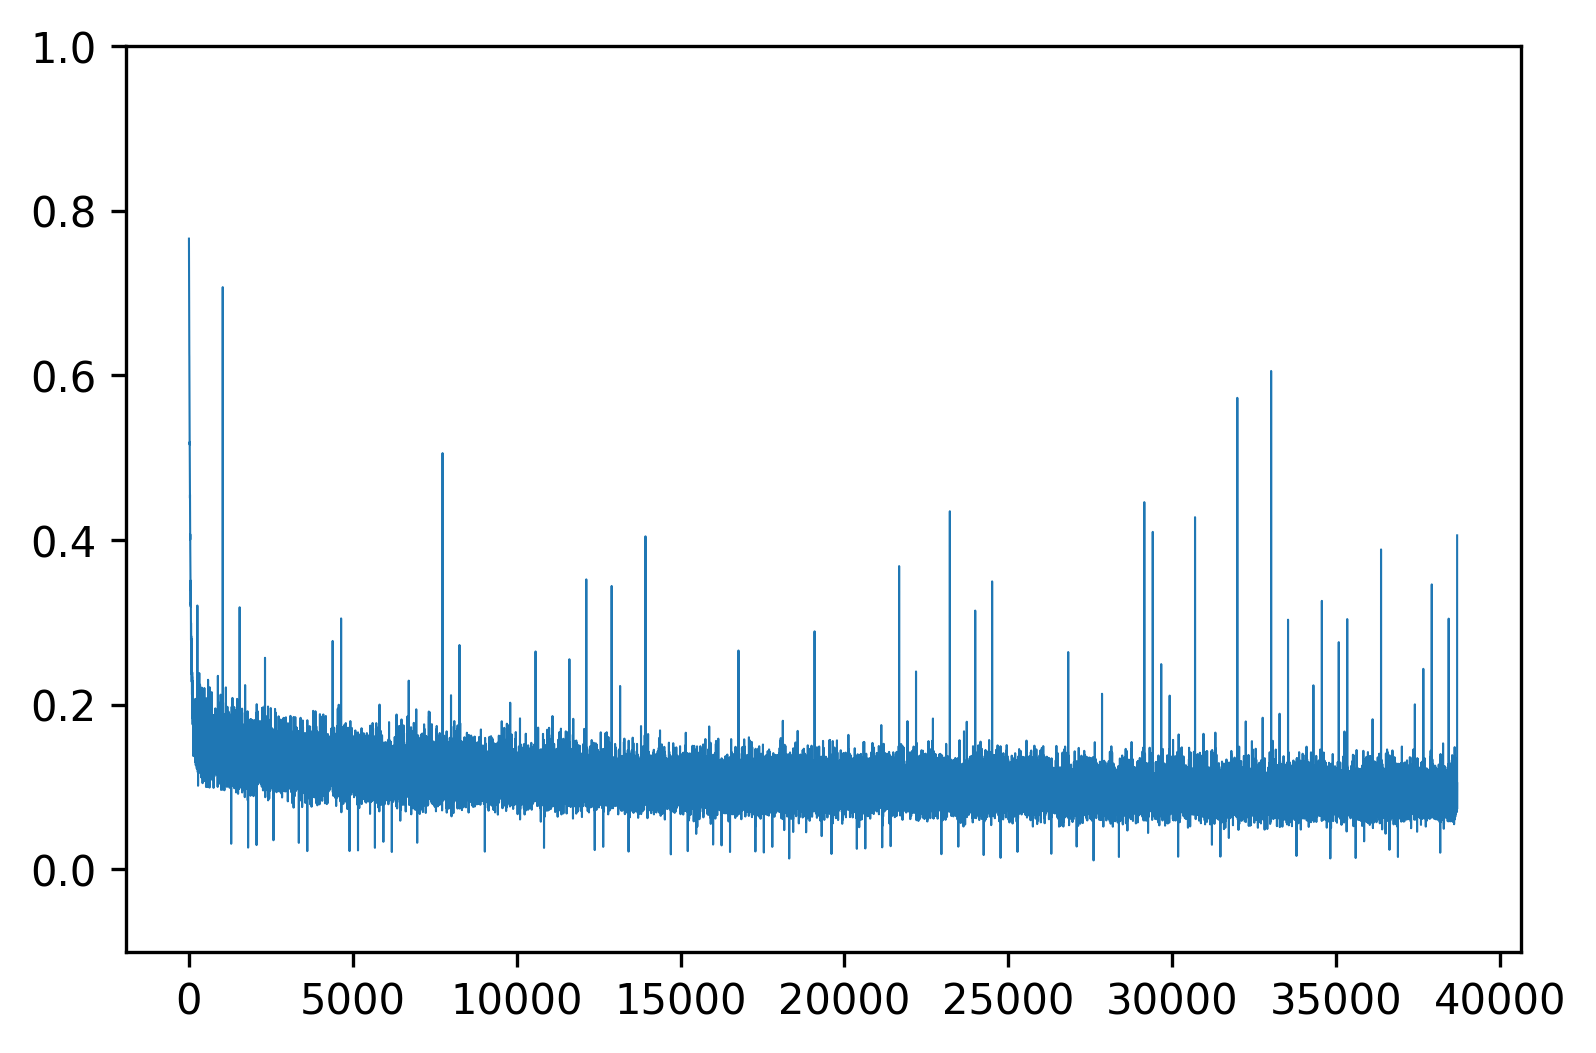

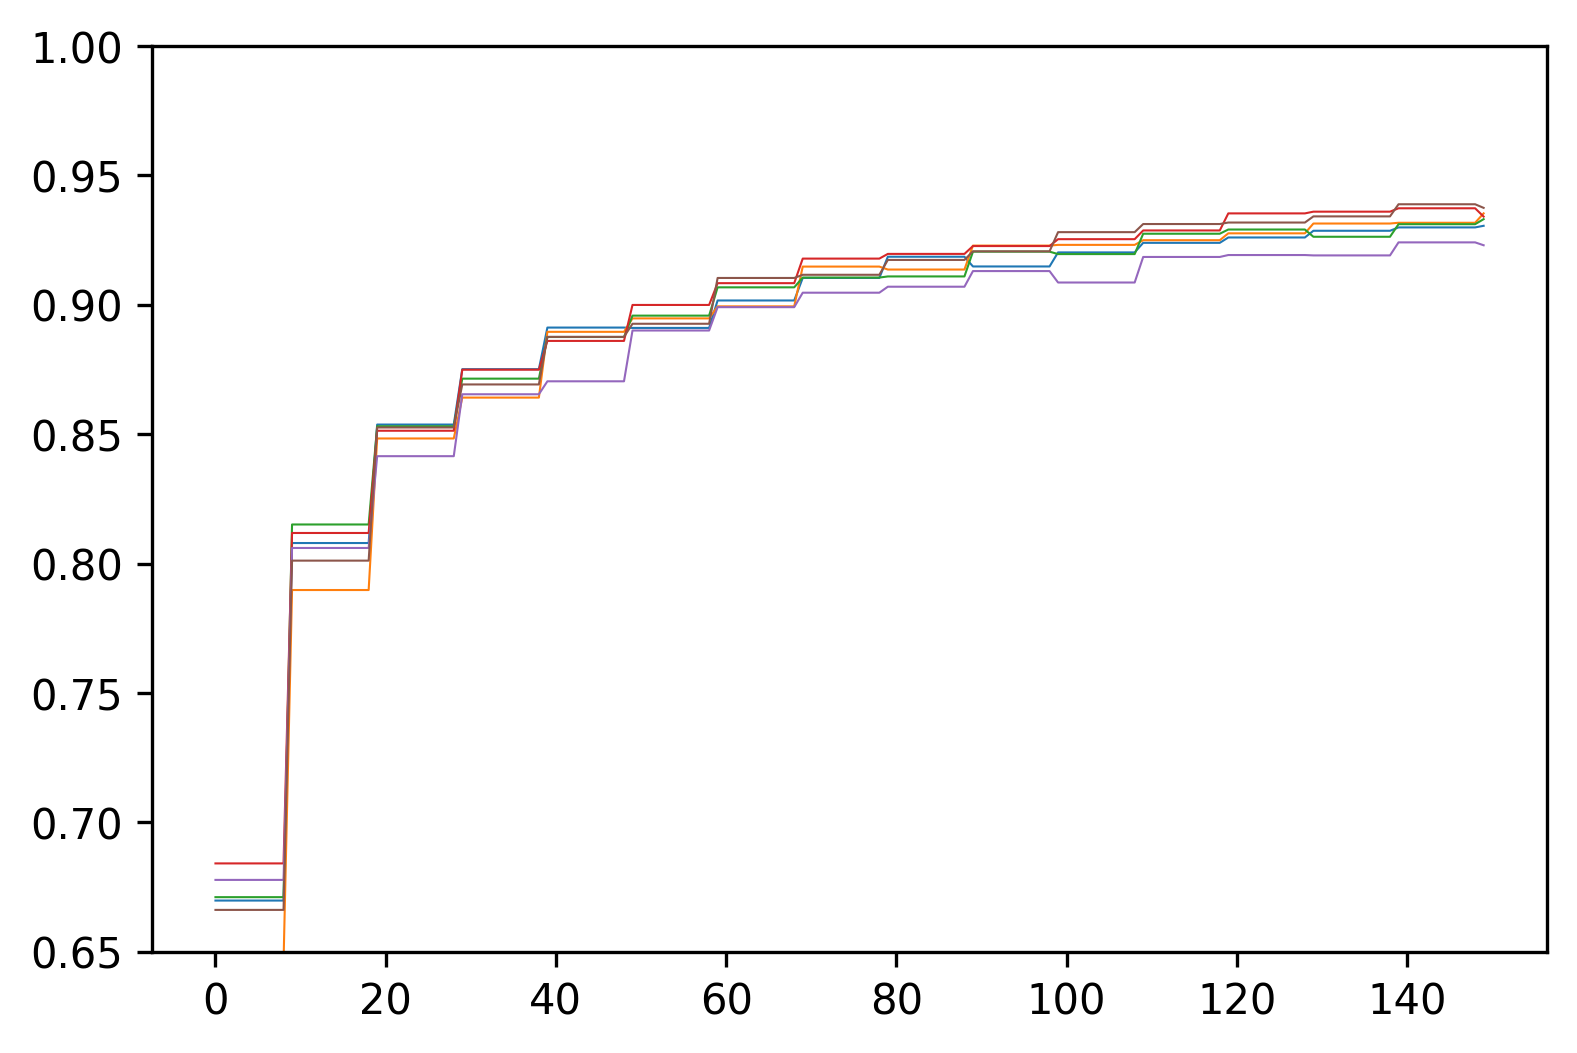

In [25]:
plot_curves(collect(curve_list, 'train_loss'), ylim=[-0.1, 1.0], agg=np.mean)
plot_curves(collect(curve_list, 'train'), ylim=[0.65, 1.00])

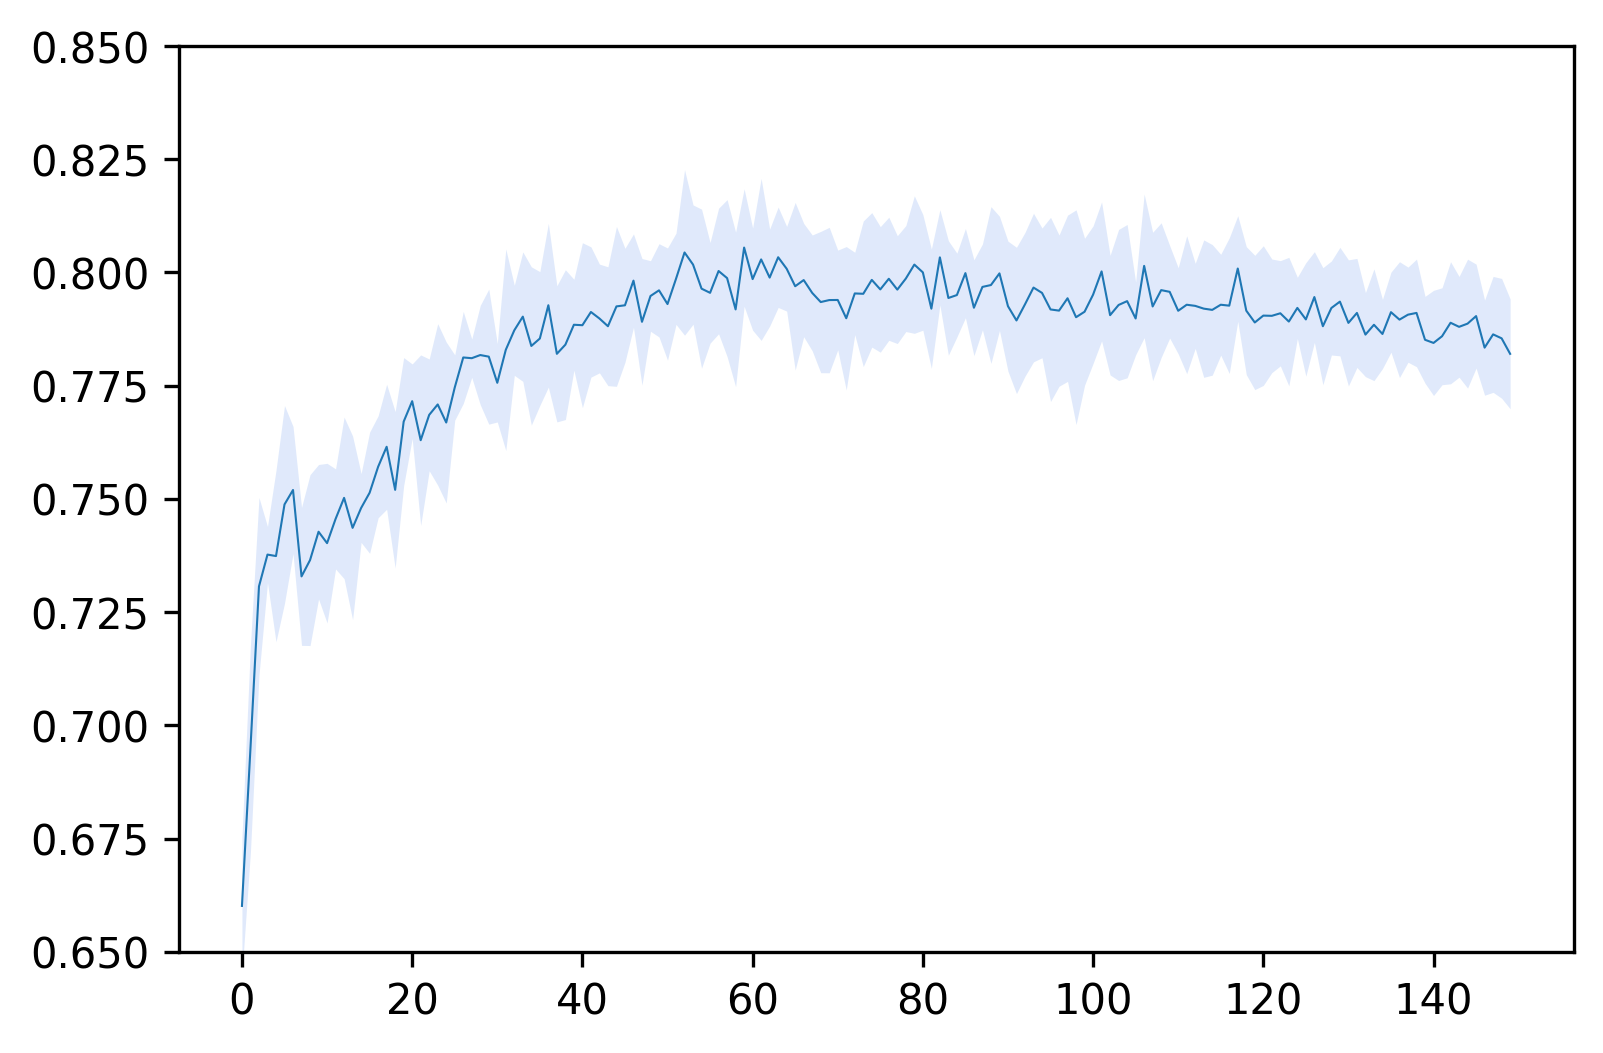

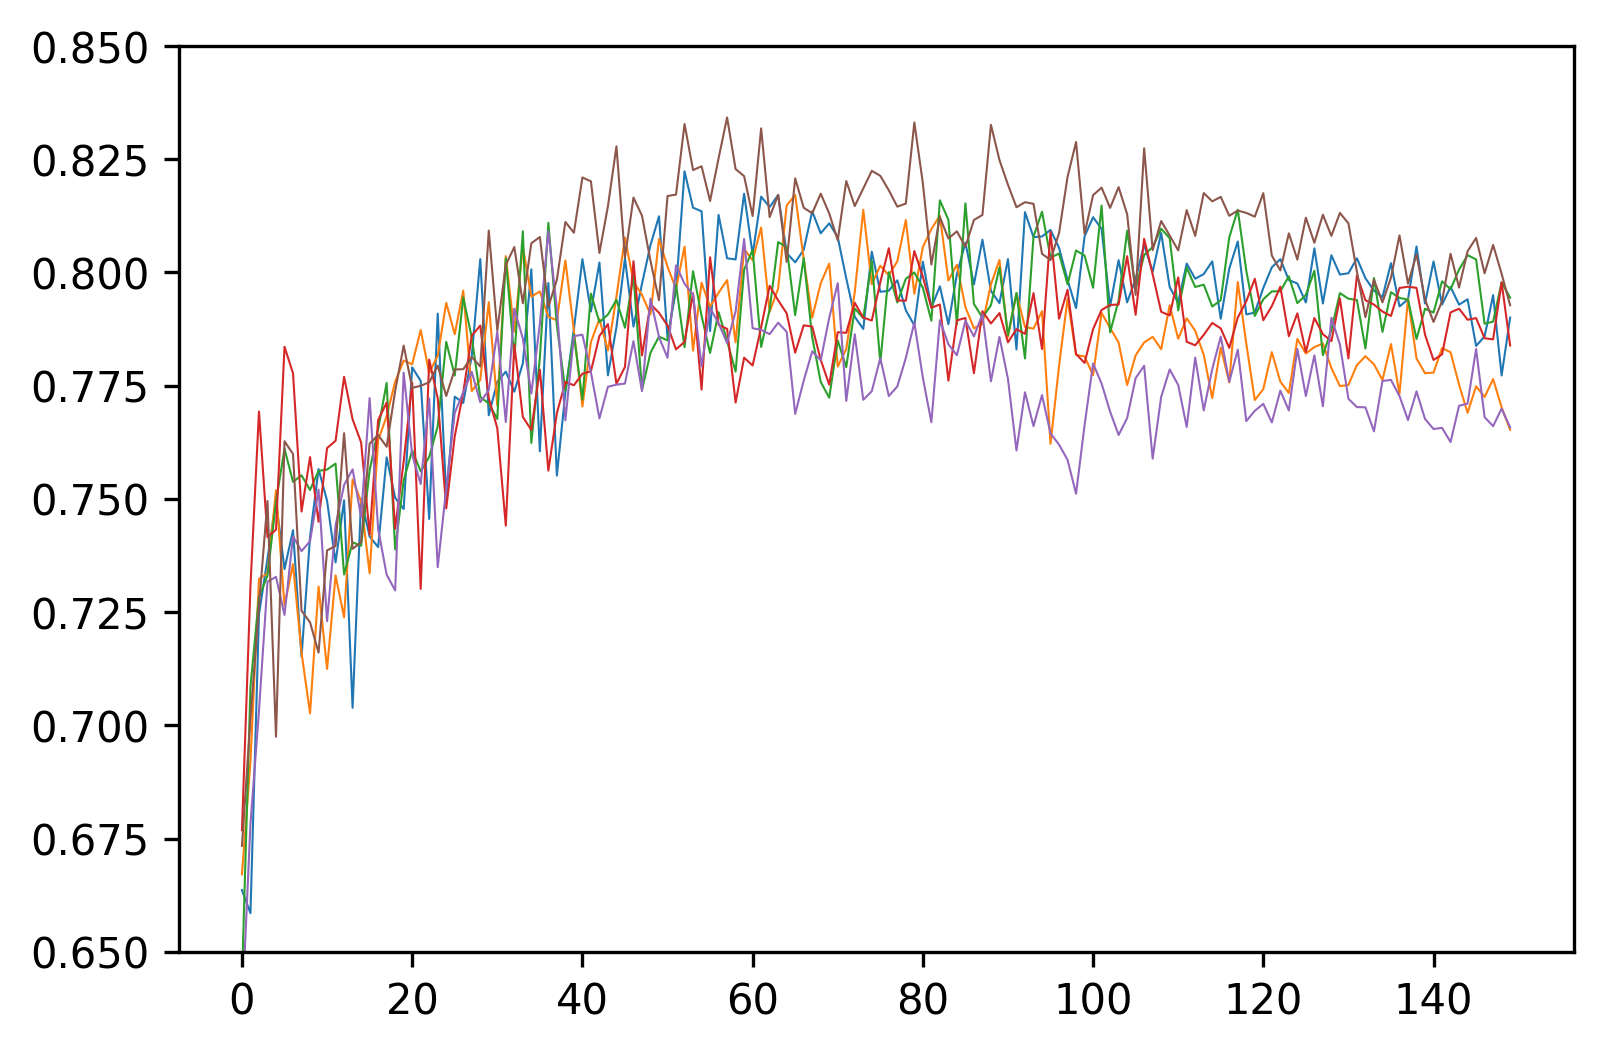

In [26]:
plot_curves(collect(curve_list, 'val'), ylim=[0.65, 0.85], agg=np.mean, err_agg=np.std)
plot_curves(collect(curve_list, 'val'), ylim=[0.65, 0.85])

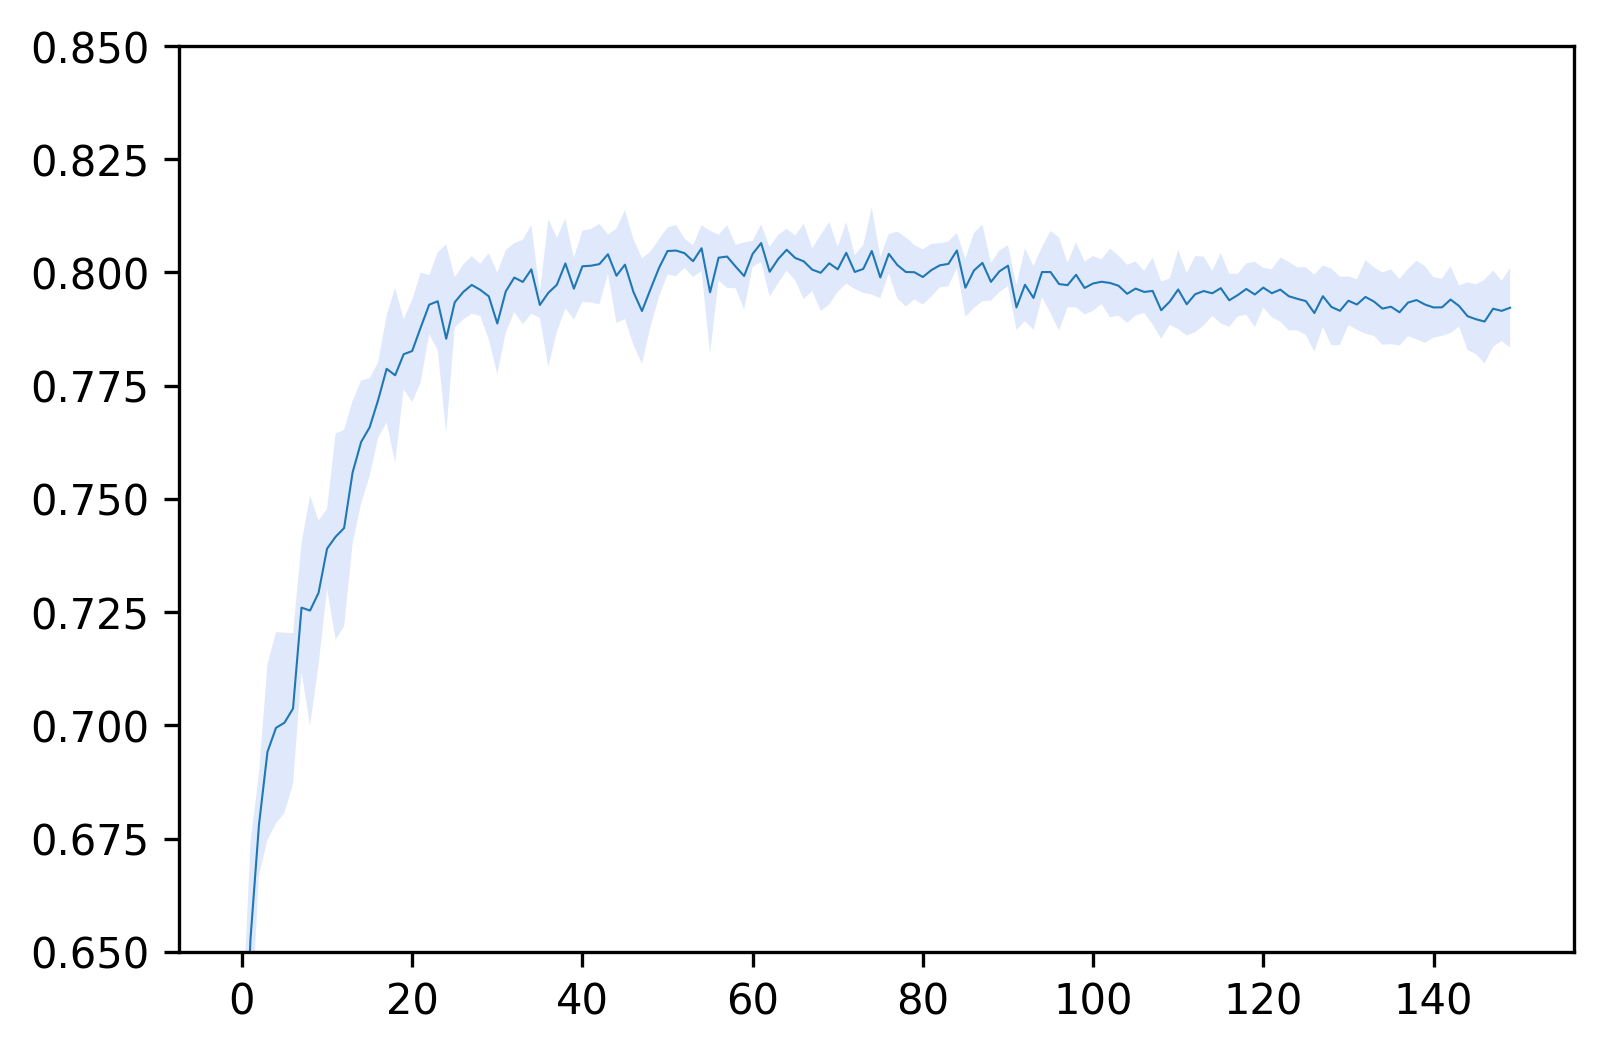

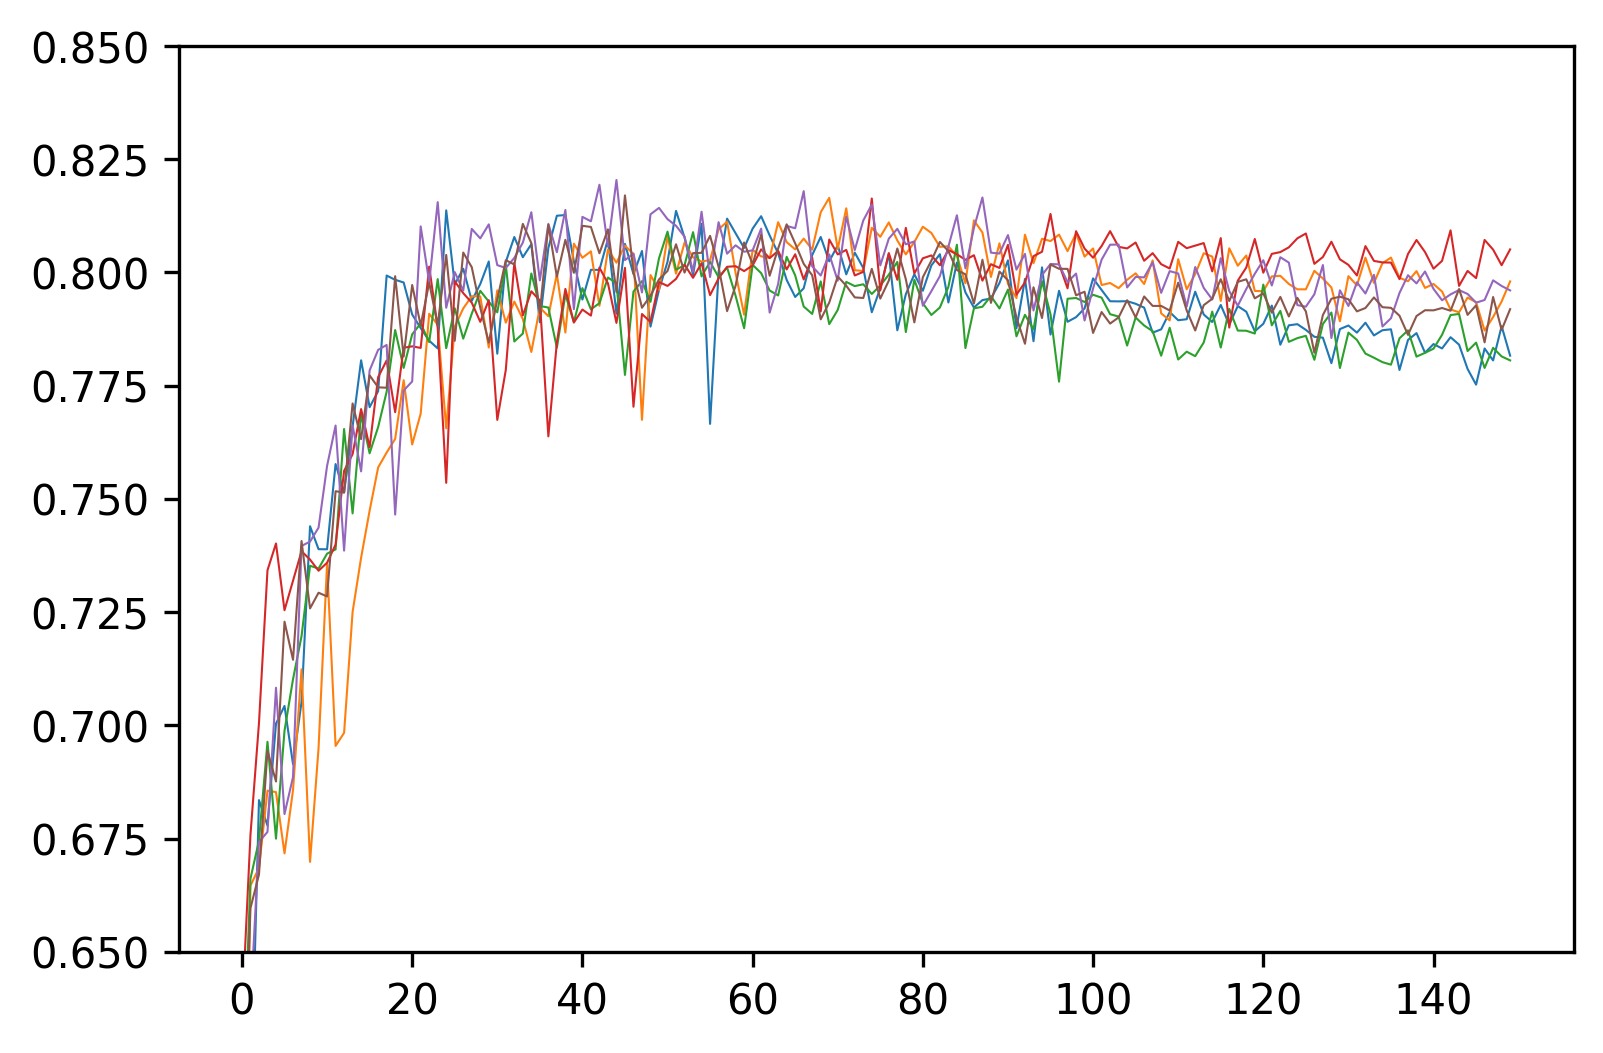

In [27]:
plot_curves(collect(curve_list, 'test'), ylim=[0.65, 0.85], agg=np.mean, err_agg=np.std)
plot_curves(collect(curve_list, 'test'), ylim=[0.65, 0.85])

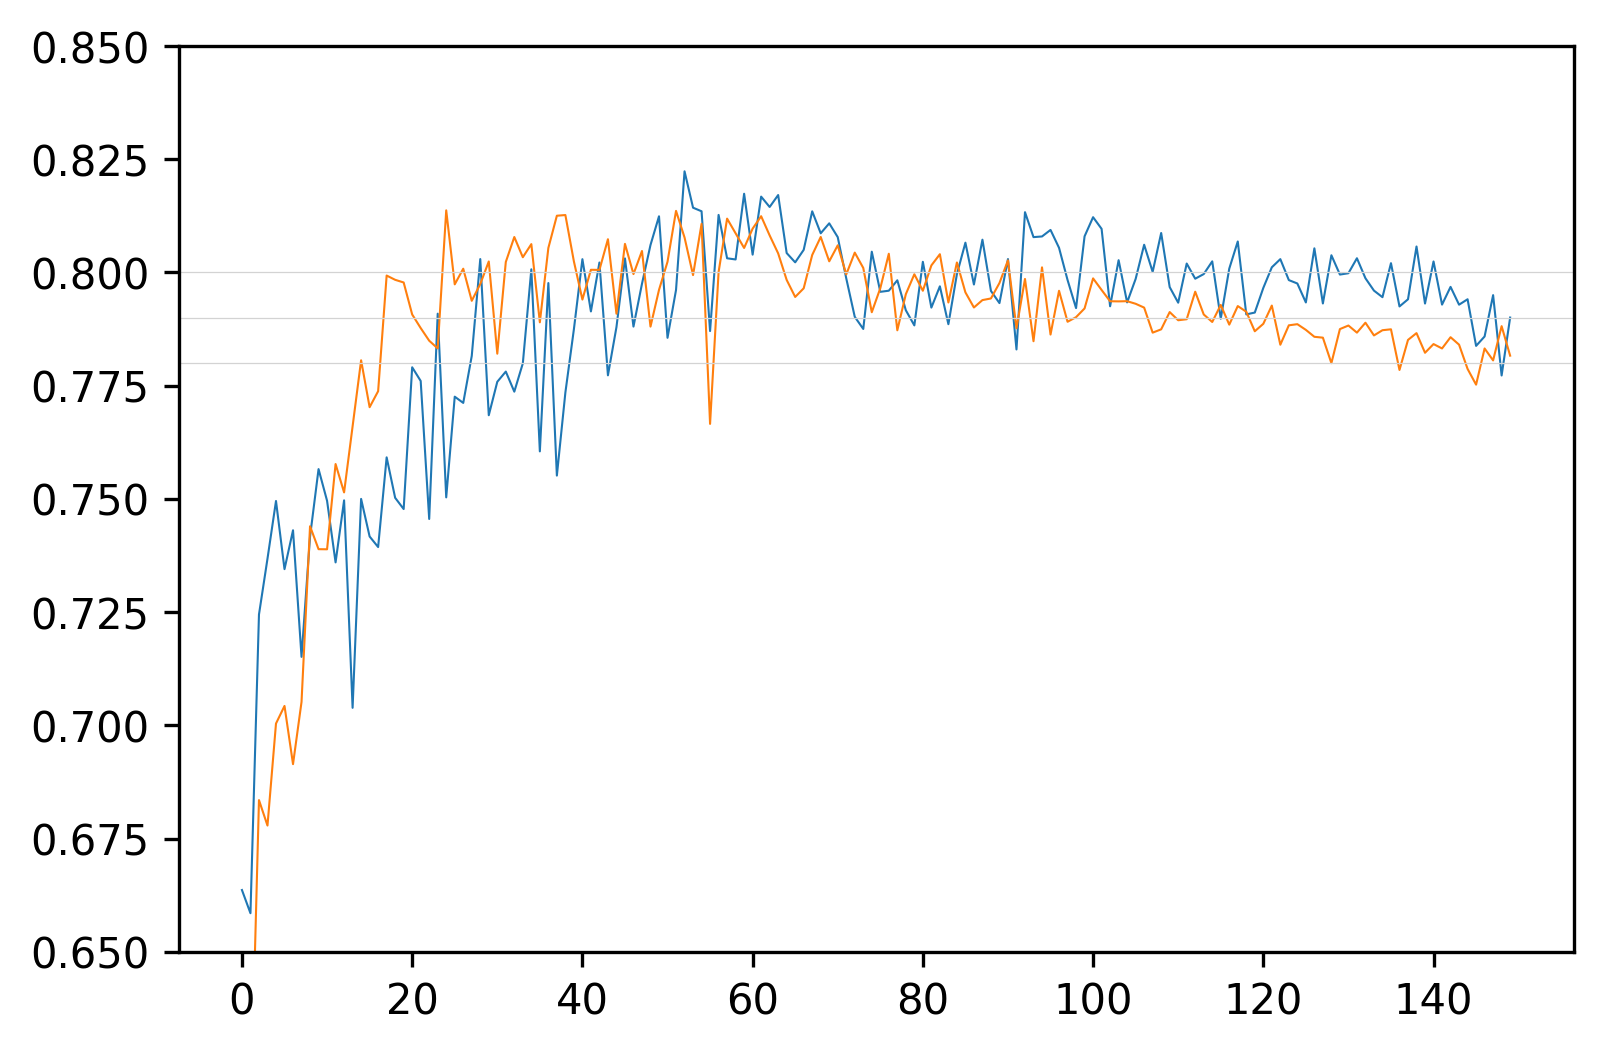

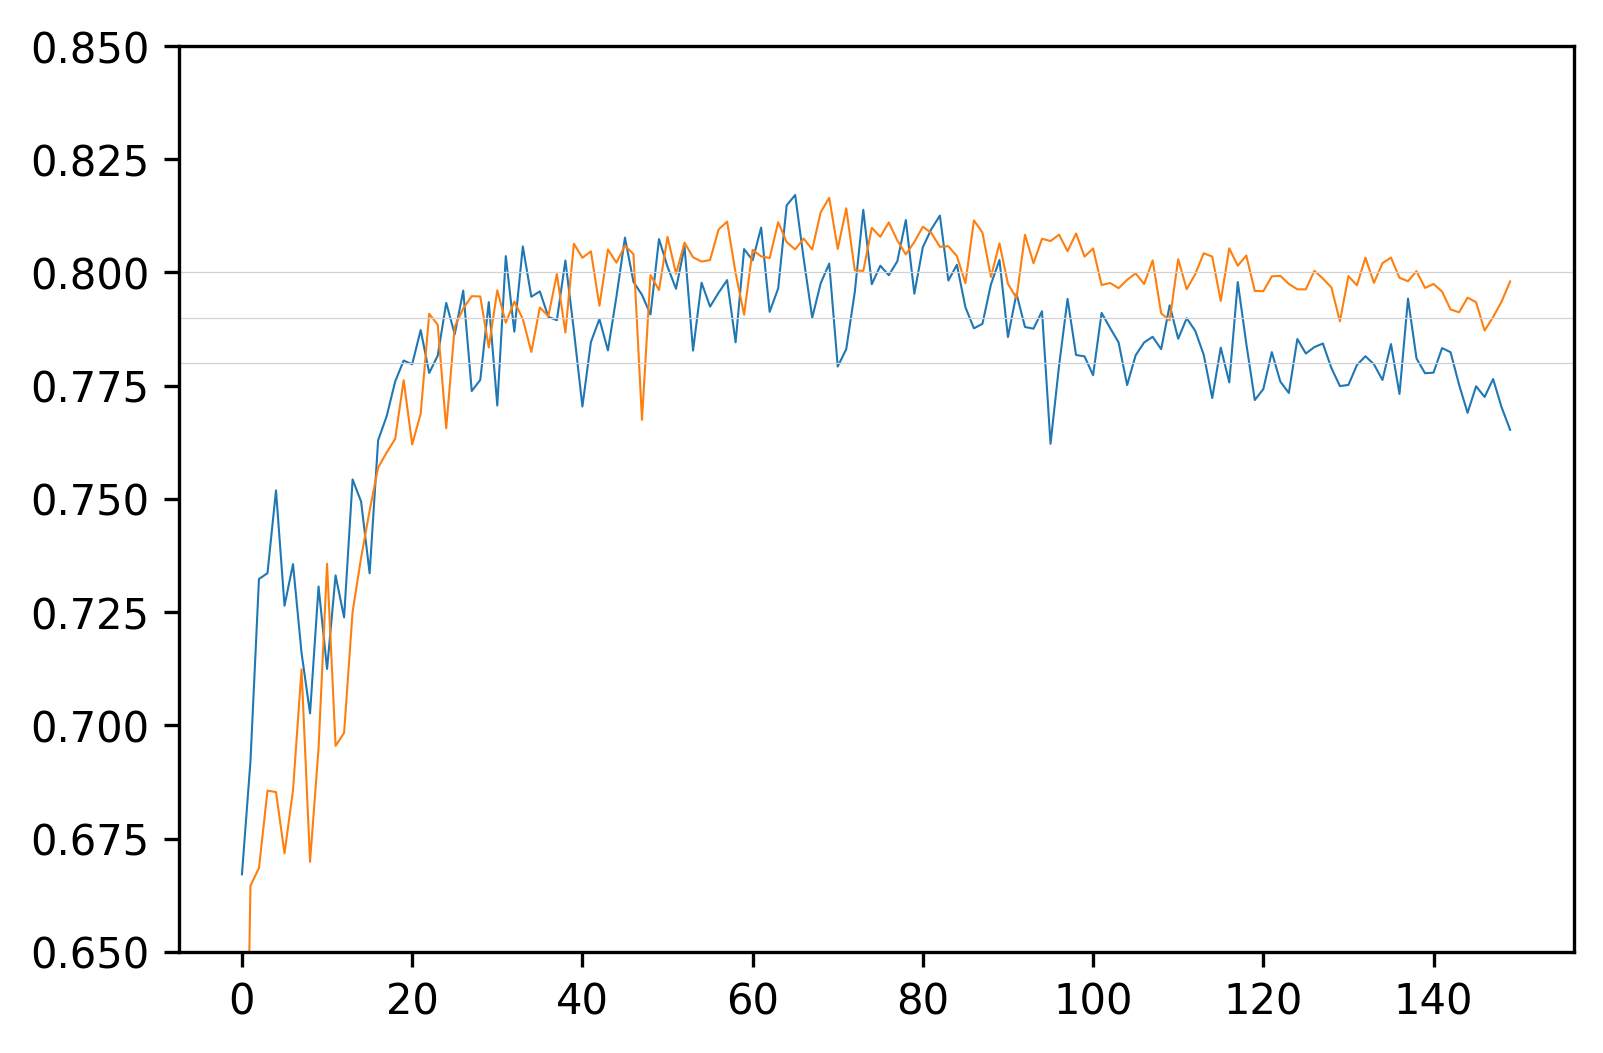

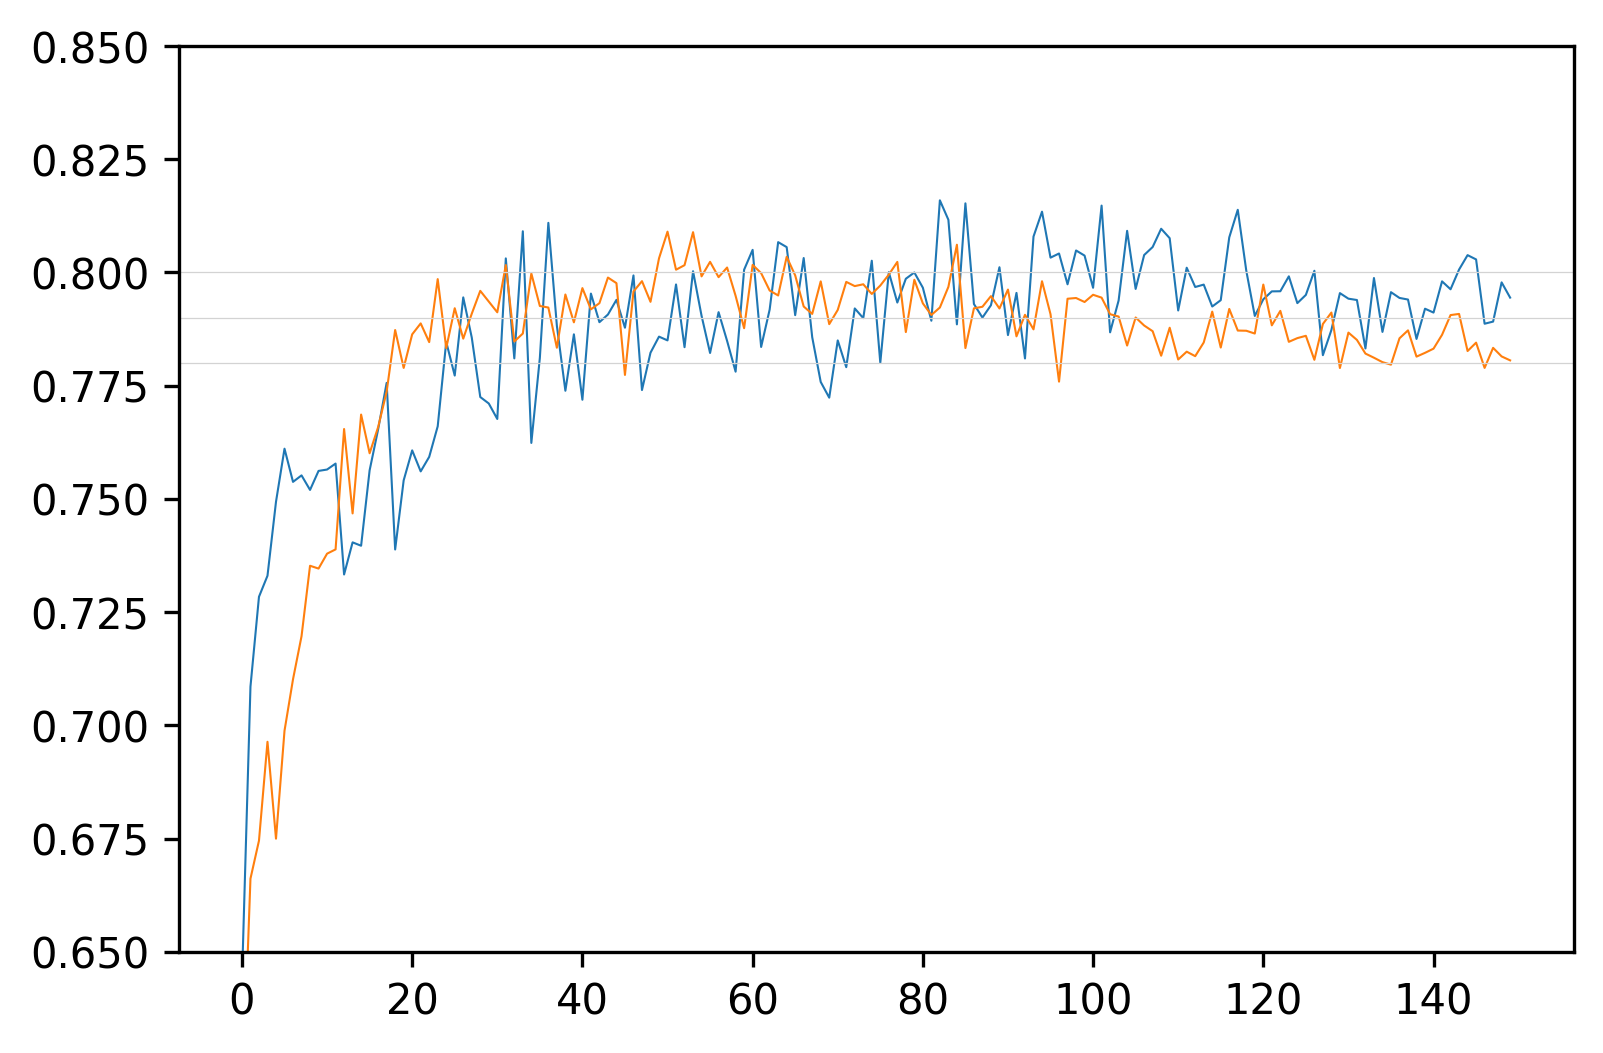

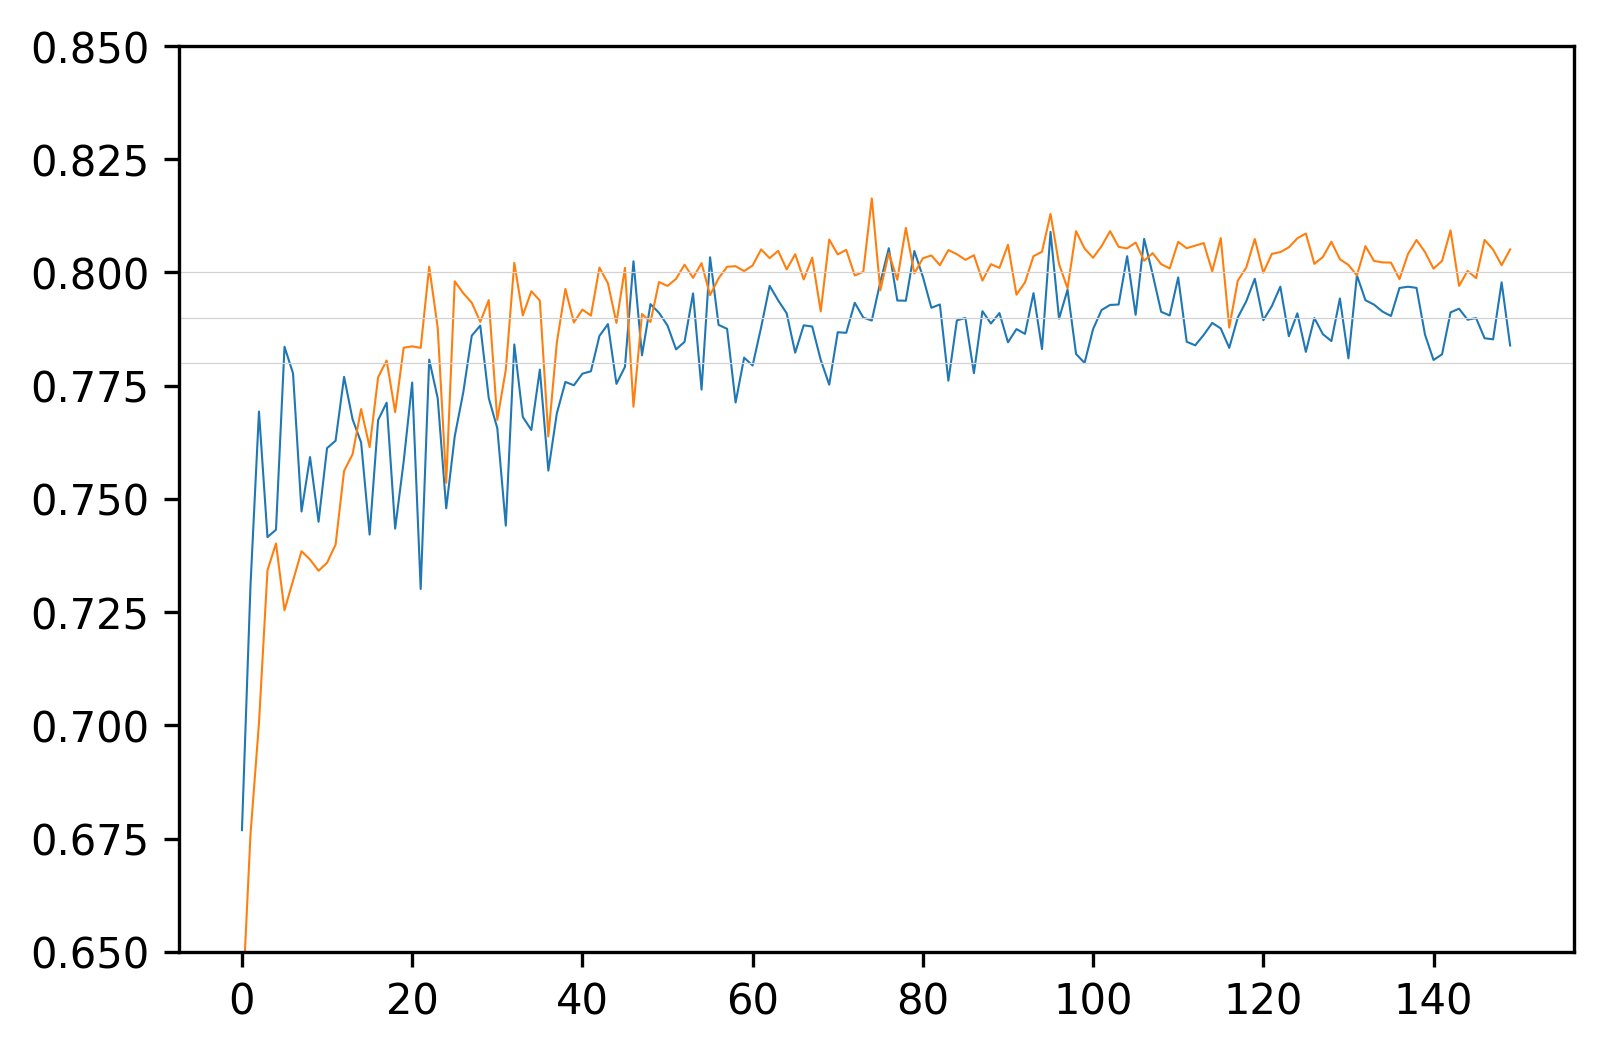

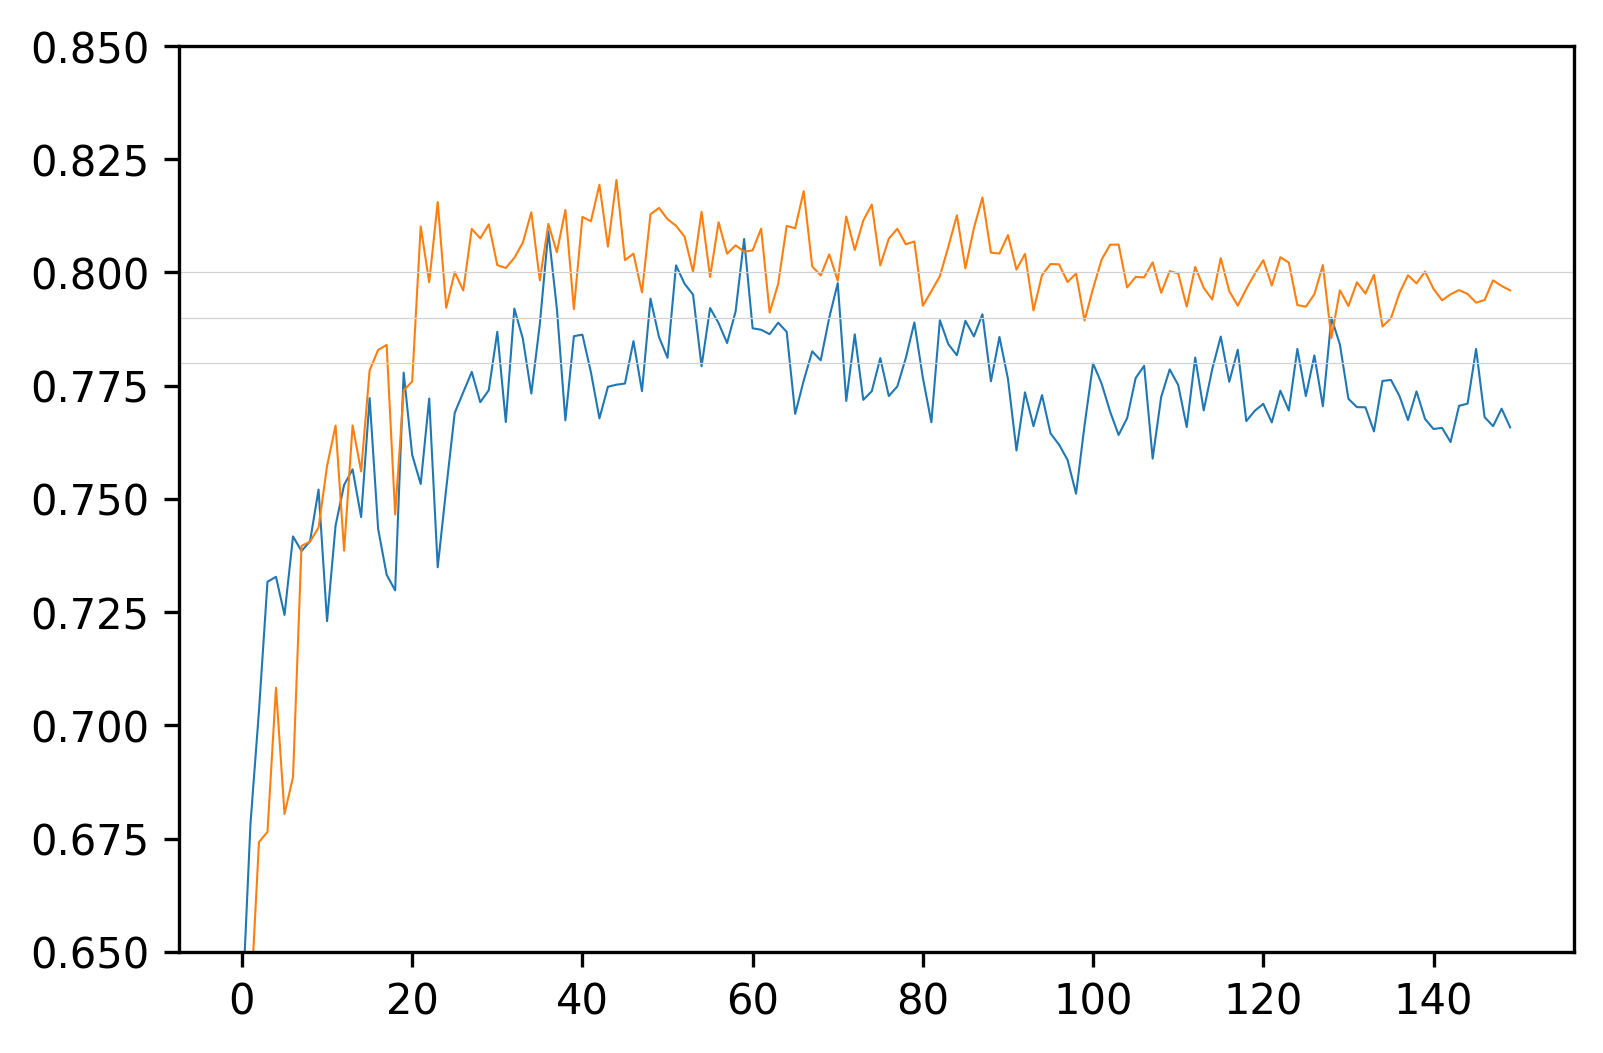

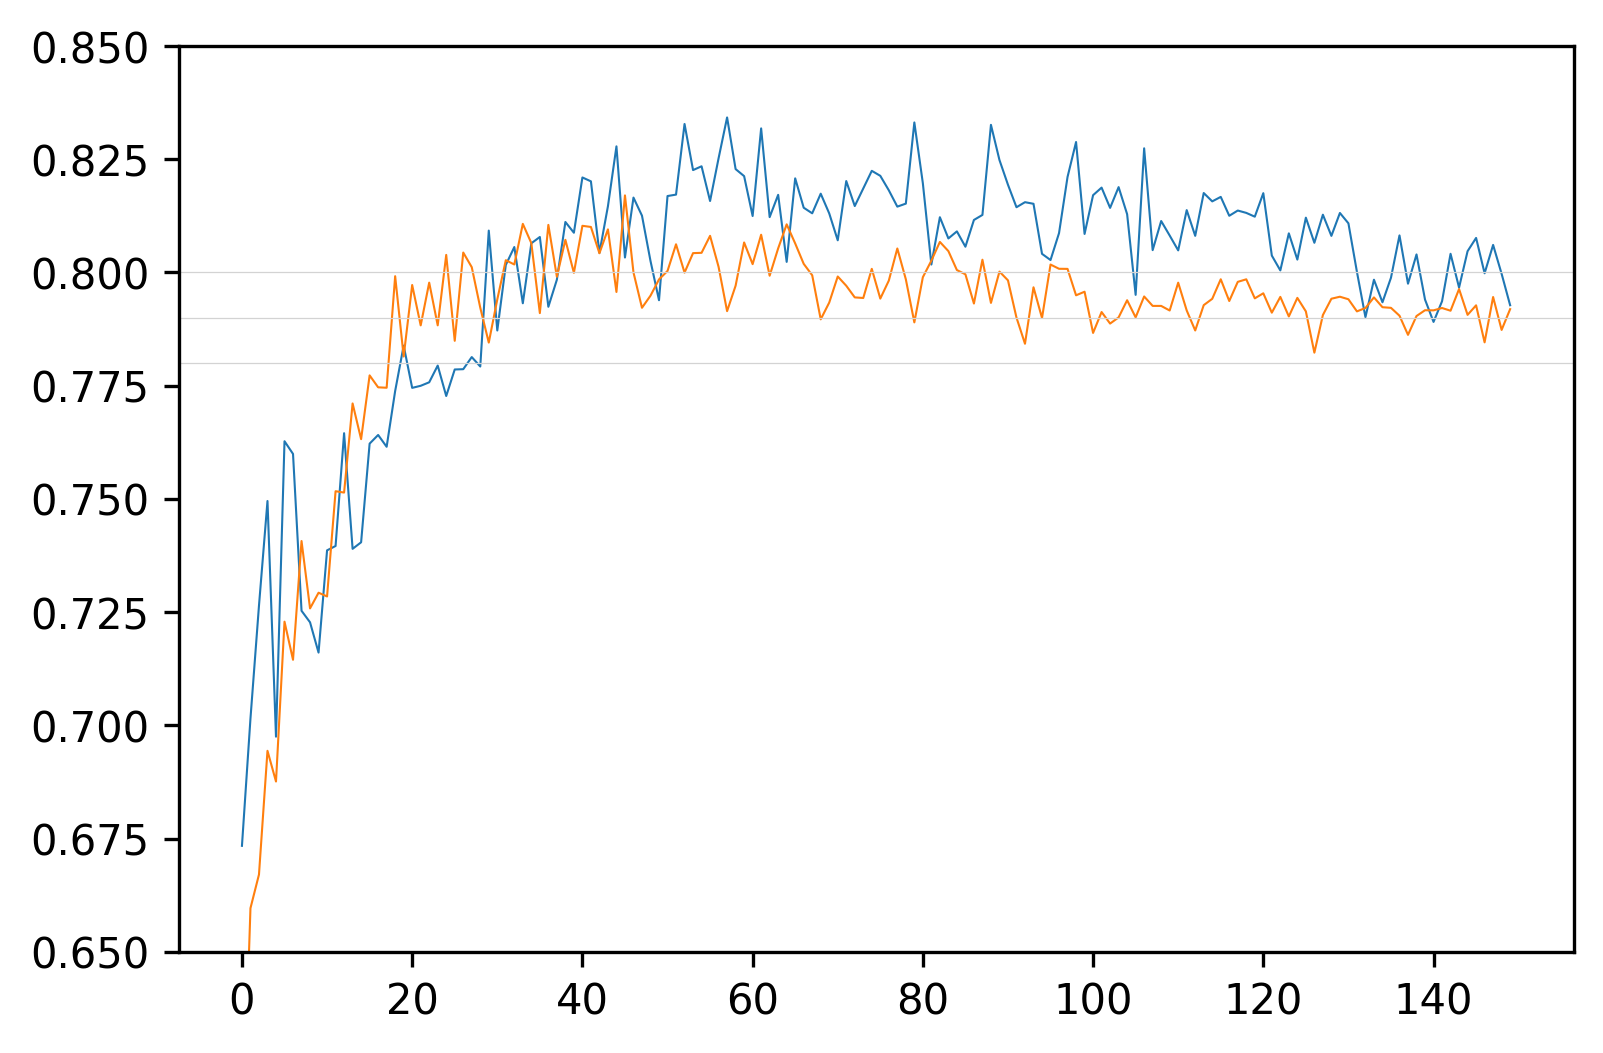

--------------------------
Seed 0 -- val: 0.8222981579463061, test: 0.8076981015469593, idx: 52
Seed 1 -- val: 0.8170745149911817, test: 0.8050638289654106, idx: 65
Seed 2 -- val: 0.815898736037625, test: 0.7922343034821064, idx: 82
Seed 3 -- val: 0.8089267342739564, test: 0.8128893953147027, idx: 95
Seed 4 -- val: 0.8090645208700764, test: 0.8106973869715521, idx: 36
Seed 5 -- val: 0.8341937340779934, test: 0.7914328202553159, idx: 57
--------------------------
Val:  0.817909399699523 ± 0.009466791490164965
Test: 0.8033359727560078 ± 0.009299505972134567


In [28]:
input_data = zip(collect(curve_list, 'val'), collect(curve_list, 'test'))
vals, tests, idxs = list(), list(), list()
for i, (val_curve, test_curve) in enumerate(input_data):
    best_idx = np.argmax(val_curve)
    val_perf = val_curve[best_idx]
    test_perf = test_curve[best_idx]
    vals.append(val_perf)
    tests.append(test_perf)
    idxs.append(best_idx)
    plot_curves([val_curve, test_curve], ylim=[0.65, 0.85], anchors=[0.78, 0.79, 0.80])
print('--------------------------')
for i in range(len(idxs)):
    print(f'Seed {seeds_found[i]} -- val: {vals[i]}, test: {tests[i]}, idx: {idxs[i]}')
print('--------------------------')
print('Val:  {} ± {}'.format(np.mean(vals), np.std(vals, ddof=1)))
print('Test: {} ± {}'.format(np.mean(tests), np.std(tests, ddof=1)))